## Structural bioinformatics with composable packages

This example shows how different Julia packages can be used together to carry out standard tasks in bioinformatics.
The example focuses on structural bioinformatics and consists of downloading and reading a protein file from the Protein Data Bank (PDB), viewing the protein, calculating a distance map of Cβ atoms, extracting the protein sequence, aligning this sequence to a related sequence, forming a graph structure from the Cβ atom contacts and calculating node properties of this graph.
More information can be found in the documentation of each package.

First we import the relevant packages:

In [1]:
using BioStructures
using Bio3DView
using BioAlignments
using Plots
using LightGraphs

### Downloading and reading macromolecular structures

We select a PDB ID corresponding to crambin, a small protein consisting of 46 residues.
The PDB entry is downloaded from the PDB and read into a data structure using BioStructures.jl.
This allows various properties of the protein structure to be accessed easily - see [the BioStructures.jl paper](https://academic.oup.com/bioinformatics/advance-article/doi/10.1093/bioinformatics/btaa502/5837108?guestAccessKey=aec90643-1d43-4521-9883-4a4a669187da) for more.

In [2]:
pdbid = "1CRN"
downloadpdb(pdbid)
struc = read("$pdbid.pdb", PDB)

┌ Info: Downloading file from PDB: 1CRN
└ @ BioStructures C:\Users\Joe\.julia\dev\BioStructures\src\pdb.jl:238


ProteinStructure 1CRN.pdb with 1 models, 1 chains (A), 46 residues, 327 atoms

### Viewing molecular structures

Bio3DView.jl is a wrapper around the JavaScript library 3Dmol.js and allows visualisation of protein structures from a notebook or the terminal.
In this case we see that crambin has an α/β fold.

In [3]:
viewstruc(struc)

HTML{String}("<script type='text/javascript'>/*! jQuery v3.3.1 | (c) JS Foundation and other contributors | jquery.org/license */\n!function(e,t){\"use strict\";\"object\"==typeof module&&\"object\"==typeof module.exports?module.exports=e.document?t(e,!0):function(e){if(!e.document)throw new Error(\"jQuery requires a window with a document\");return t(e)}:t(e)}(\"undefined\"!=typeof window?window:this,function(e,t){\"use strict\";var n=[],r=e.document,i=Object.getPrototypeOf,o=n.slice,a=n.concat,s=n.push,u=n.indexOf,l={},c=l.toString,f=l.hasOwnProperty,p=f.toString,d=p.call(Object),h={},g=function e(t){return\"function\"==typeof t&&\"number\"!=typeof t.nodeType},y=function e(t){return null!=t&&t===t.window},v={type:!0,src:!0,noModule:!0};function m(e,t,n){var i,o=(t=t||r).createElement(\"script\");if(o.text=e,n)for(i in v)n[i]&&(o[i]=n[i]);t.head.appendChild(o).parentNode.removeChild(o)}function x(e){return null==e?e+\"\":\"object\"==typeof e||\"function\"==typeof e?l[c.call(e)]||\"object\":typeof e}var b=\"3.3.1\",w=function(e,t){return new w.fn.init(e,t)},T=/^[\\s\\uFEFF\\xA0]+|[\\s\\uFEFF\\xA0]+\$/g;w.fn=w.prototype={jquery:\"3.3.1\",constructor:w,length:0,toArray:function(){return o.call(this)},get:function(e){return null==e?o.call(this):e<0?this[e+this.length]:this[e]},pushStack:function(e){var t=w.merge(this.constructor(),e);return t.prevObject=this,t},each:function(e){return w.each(this,e)},map:function(e){return this.pushStack(w.map(this,function(t,n){return e.call(t,n,t)}))},slice:function(){return this.pushStack(o.apply(this,arguments))},first:function(){return this.eq(0)},last:function(){return this.eq(-1)},eq:function(e){var t=this.length,n=+e+(e<0?t:0);return this.pushStack(n>=0&&n<t?[this[n]]:[])},end:function(){return this.prevObject||this.constructor()},push:s,sort:n.sort,splice:n.splice},w.extend=w.fn.extend=function(){var e,t,n,r,i,o,a=arguments[0]||{},s=1,u=arguments.length,l=!1;for(\"boolean\"==typeof a&&(l=a,a=arguments[s]||{},s++),\"object\"==typeof a||g(a)||(a={}),s===u&&(a=this,s--);s<u;s++)if(null!=(e=arguments[s]))for(t in e)n=a[t],a!==(r=e[t])&&(l&&r&&(w.isPlainObject(r)||(i=Array.isArray(r)))?(i?(i=!1,o=n&&Array.isArray(n)?n:[]):o=n&&w.isPlainObject(n)?n:{},a[t]=w.extend(l,o,r)):void 0!==r&&(a[t]=r));return a},w.extend({expando:\"jQuery\"+(\"3.3.1\"+Math.random()).replace(/\\D/g,\"\"),isReady:!0,error:function(e){throw new Error(e)},noop:function(){},isPlainObject:function(e){var t,n;return!(!e||\"[object Object]\"!==c.call(e))&&(!(t=i(e))||\"function\"==typeof(n=f.call(t,\"constructor\")&&t.constructor)&&p.call(n)===d)},isEmptyObject:function(e){var t;for(t in e)return!1;return!0},globalEval:function(e){m(e)},each:function(e,t){var n,r=0;if(C(e)){for(n=e.length;r<n;r++)if(!1===t.call(e[r],r,e[r]))break}else for(r in e)if(!1===t.call(e[r],r,e[r]))break;return e},trim:function(e){return null==e?\"\":(e+\"\").replace(T,\"\")},makeArray:function(e,t){var n=t||[];return null!=e&&(C(Object(e))?w.merge(n,\"string\"==typeof e?[e]:e):s.call(n,e)),n},inArray:function(e,t,n){return null==t?-1:u.call(t,e,n)},merge:function(e,t){for(var n=+t.length,r=0,i=e.length;r<n;r++)e[i++]=t[r];return e.length=i,e},grep:function(e,t,n){for(var r,i=[],o=0,a=e.length,s=!n;o<a;o++)(r=!t(e[o],o))!==s&&i.push(e[o]);return i},map:function(e,t,n){var r,i,o=0,s=[];if(C(e))for(r=e.length;o<r;o++)null!=(i=t(e[o],o,n))&&s.push(i);else for(o in e)null!=(i=t(e[o],o,n))&&s.push(i);return a.apply([],s)},guid:1,support:h}),\"function\"==typeof Symbol&&(w.fn[Symbol.iterator]=n[Symbol.iterator]),w.each(\"Boolean Number String Function Array Date RegExp Object Error Symbol\".split(\" \"),function(e,t){l[\"[object \"+t+\"]\"]=t.toLowerCase()});function C(e){var t=!!e&&\"length\"in e&&e.length,n=x(e);return!g(e)&&!y(e)&&(\"array\"===n||0===t||\"number\"==typeof t&&t>0&&t-1 in e)}var E=function(e){var t,n,r,i,o,a,s,u,l,c,f,p,d,h,g,y,v,m,x,b=\"sizzle\"+1*new Date,w=e.document,T=0,C=0,E=ae(),k=ae(),S=ae(),D=function(e,t){return e===t&&(f=!0),0},N

### Calculating and viewing residue-residue distance maps

A `Vector` of Cβ atoms is extracted using the `collectatoms` function  and the `cbetaselector` atom selector function.
A distance map, a matrix with the value at (i, j) corresponding to the distance between the Cβ atoms of i and j, can be calculated.
In this case the Cβ atom of a residue is used as a proxy for the residue position.
This distance map can be plotted using Plots.jl since a [plot recipe](http://docs.juliaplots.org/latest/recipes) for it is defined.

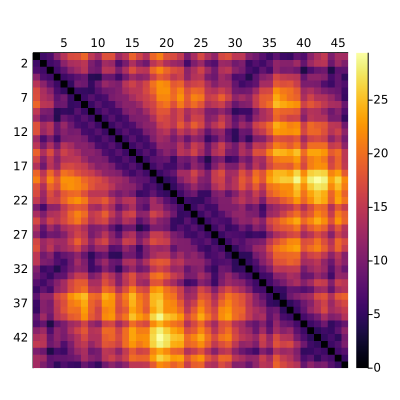

In [4]:
cbetas = collectatoms(struc, cbetaselector)
dm = DistanceMap(cbetas)
plot(dm; size=(400, 400))

### Extracting and aligning protein sequences

BioSequences.jl defines a memory-efficient and performant sequence type and this can be extracted from the protein structure.

In [5]:
LongAminoAcidSeq(struc)

46aa Amino Acid Sequence:
TTCCPSIVARSNFNVCRLPGTPEAICATYTGCIIIPGATCPGDYAN

BioAlignments.jl can be used to align this protein sequence to a related sequence from PDB ID 1OKH, indicating a close match.

In [6]:
seq1 = LongAminoAcidSeq(struc)
seq2 = LongAminoAcidSeq("KSCCPNTTGRNIYNACRLTGAPRPTCAKLSGCKIISGSTCPSDYPK")
scoremodel = AffineGapScoreModel(BLOSUM62, gap_open=-10, gap_extend=-1)
pairalign(GlobalAlignment(), seq1, seq2, scoremodel)

PairwiseAlignmentResult{Int64, LongAminoAcidSeq, LongAminoAcidSeq}:
  score: 136
  seq:  1 TTCCPSIVARSNFNVCRLPGTPEAICATYTGCIIIPGATCPGDYAN 46
            |||    |   | ||| | |   ||   || || | ||| ||  
  ref:  1 KSCCPNTTGRNIYNACRLTGAPRPTCAKLSGCKIISGSTCPSDYPK 46


### Constructing a graph from residue contacts

LightGraphs.jl defines a lightweight and efficient graph data structure.
Here we construct a graph where the nodes are Cβ atoms and the edges are between Cβ atoms closer than 8 Å apart.

In [7]:
g = MetaGraph(cbetas, 8.0)

{46, 197} undirected Int64 metagraph with Float64 weights defined by :weight (default weight 1.0)

Now the graph is defined, all the graph analysis functions from the LightGraphs.jl ecosystem can be used.
Here we calculate the betweenness centrality, a measure of how important each residue is to the flow of information through a network.
In the context of a protein this could be linked to the transmission of an allosteric signal across the protein.

In [8]:
betweenness_centrality(g)

46-element Vector{Float64}:
 0.08039076255479669
 0.10765184353303078
 0.10671319509469472
 0.08332623302203065
 0.03580749098169891
 0.005365480028573702
 0.005343121992527617
 0.0015327876279497756
 0.046905014809312535
 0.04791945984388812
 0.011013447055762368
 0.020605086081199896
 0.14375037923536463
 ⋮
 0.05276324450795969
 0.0
 0.007121254065443647
 0.002024592756065832
 0.007954144620811288
 0.031980186447799645
 0.021164050384410882
 0.0006032547699214366
 0.0032956895128284096
 0.0769710995162363
 0.009291736804595491
 0.03723153015132043